# Regularization

In [44]:
from neuralnetwork import Network
from neuralnetwork.datasets import nregion
from neuralnetwork.activations import absolute, relu, sigmoid

Layer: L0, Neurons: 1
Layer: L1, Neurons: 12, Weights: (12, 1), Biases: (12, 1)
Layer: L2, Neurons: 12, Weights: (12, 12), Biases: (12, 1)
Layer: L3, Neurons: 1, Weights: (1, 12), Biases: (1, 1)


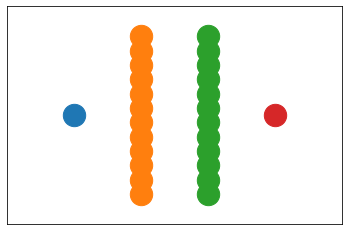

In [48]:
mynetwork = Network(1)
mynetwork.add_layer(number_of_neurons = 12 , activation=absolute)
mynetwork.add_layer(number_of_neurons = 12, activation=relu)
mynetwork.add_layer(number_of_neurons = 1, activation=sigmoid)
mynetwork.summary()

In [49]:
regions = mynetwork.layers['L1']['biases'].shape[0]
num_regions = regions // 2
num_regions

6

# Apply scoop initialization

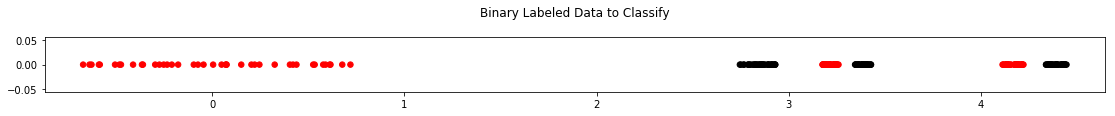

In [51]:
X_train, Y_train, X_val, Y_val, C, R = nregion.load_random_regions(regions= num_regions)
nregion.graph(X_train, Y_train)

In [52]:
len(C)

3

In [53]:
mynetwork.scoop_initialization(xmin=min(X_train), xmax= max(X_train))

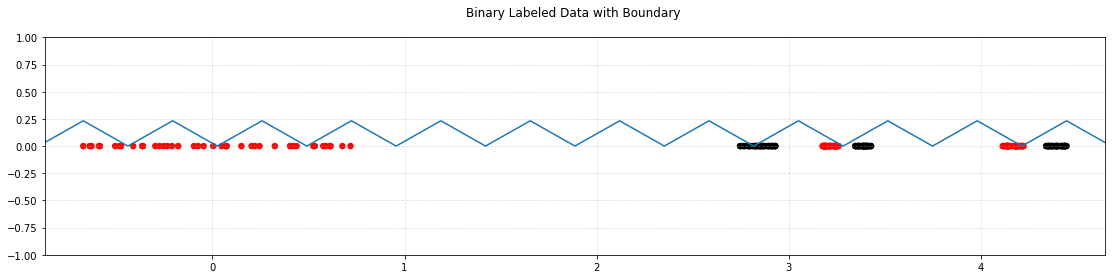

In [54]:
nregion.graph(X_train, Y_train, decision=mynetwork.decision, ylim = 1)

In [55]:
mynetwork.accuracy(X_train,Y_train)

0.4708333333333333

# APPLY REGULARIZATION

In [56]:
from neuralnetwork.optimizers import momentum, RMSprop, adam, nesterov_momentum
from neuralnetwork.regularizations import L2
num_epochs = 100
batch_size = 128
learning_rate=0.001
num_repetitions = 10

In [57]:
mynetwork.scoop_initialization(xmin=min(X_train), xmax= max(X_train))


In [58]:
from neuralnetwork.losses import binary_crossentropy_loss

In [59]:
# GRads with Regularization
grads = mynetwork.backward(X=X_train, Y=Y_train, loss_function=binary_crossentropy_loss, regularization=L2, lambd=0.1)
grads['L2']["dW"]

array([[ 0.00173214,  0.00654184,  0.01481581,  0.02308979,  0.03136376,
         0.03963774,  0.04791171,  0.05618569,  0.06445966,  0.07273364,
         0.08100761,  0.08928159],
       [ 0.01314692,  0.003039  ,  0.01364452,  0.02704024,  0.04043597,
         0.05383169,  0.06722741,  0.08062313,  0.09401885,  0.10741457,
         0.12081029,  0.13420602],
       [ 0.0235856 ,  0.01133784,  0.00331287,  0.01315768,  0.02540544,
         0.03765321,  0.04990097,  0.06214873,  0.07439649,  0.08664426,
         0.09889202,  0.11113978],
       [ 0.02256965,  0.0143651 ,  0.00616055,  0.002044  ,  0.01024855,
         0.0184531 ,  0.02665765,  0.0348622 ,  0.04306675,  0.0512713 ,
         0.05947585,  0.0676804 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  

In [60]:
# GRads without Regularization
grads = mynetwork.backward(X=X_train, Y=Y_train, loss_function=binary_crossentropy_loss, regularization=None, lambd=0.1)
grads['L2']["dW"]

array([[ 0.00173142,  0.00653911,  0.01480964,  0.02308017,  0.0313507 ,
         0.03962123,  0.04789176,  0.05616229,  0.06443282,  0.07270335,
         0.08097388,  0.08924441],
       [ 0.01314144,  0.00303774,  0.01363884,  0.02702898,  0.04041912,
         0.05380927,  0.06719941,  0.08058955,  0.09397969,  0.10736984,
         0.12075998,  0.13415012],
       [ 0.02357578,  0.01133312,  0.00331149,  0.0131522 ,  0.02539486,
         0.03763752,  0.04988019,  0.06212285,  0.07436551,  0.08660817,
         0.09885083,  0.11109349],
       [ 0.02256025,  0.01435911,  0.00615798,  0.00204315,  0.01024428,
         0.01844541,  0.02664655,  0.03484768,  0.04304881,  0.05124994,
         0.05945108,  0.06765221],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  

Loss:0.758992 Acc:0.470833 val_loss:0.747036 val_acc:0.616667: 100%|██████████| 100/100 [00:00<00:00, 1597.90it/s]

0.6886793907511044 0.0703125


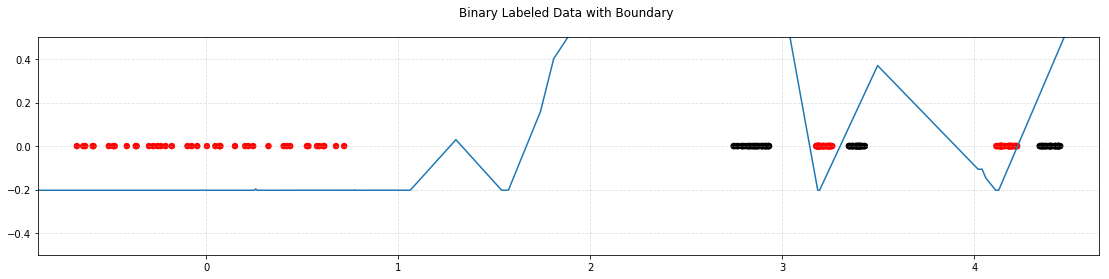

Loss:0.618355 Acc:1.000000 val_loss:0.605983 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2215.74it/s]

0.5408337452492448 0.07752098235998993


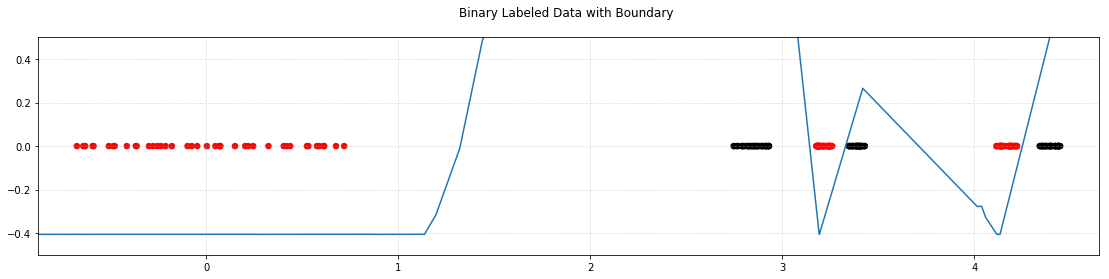

Loss:0.556856 Acc:1.000000 val_loss:0.551422 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2330.40it/s]

0.4701964567479983 0.08665915260670062


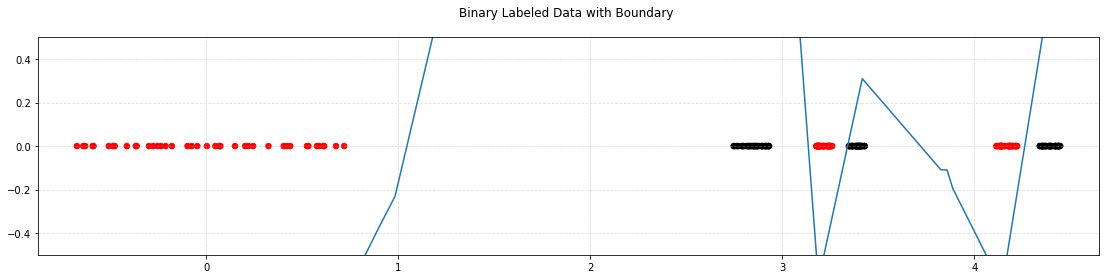

Loss:0.506475 Acc:1.000000 val_loss:0.509230 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2317.86it/s]

0.4086337915860928 0.09784078647815526


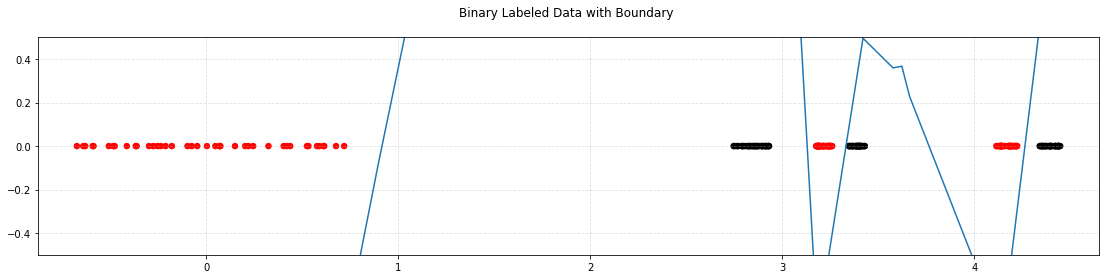

Loss:0.464038 Acc:1.000000 val_loss:0.471485 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2084.06it/s]

0.35419741559041057 0.10984066706205486


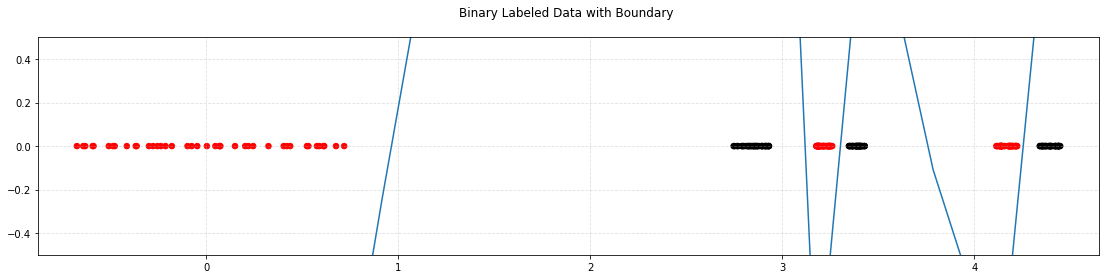

Loss:0.411801 Acc:1.000000 val_loss:0.415681 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2235.09it/s]

0.2889604531708166 0.12284099899111499


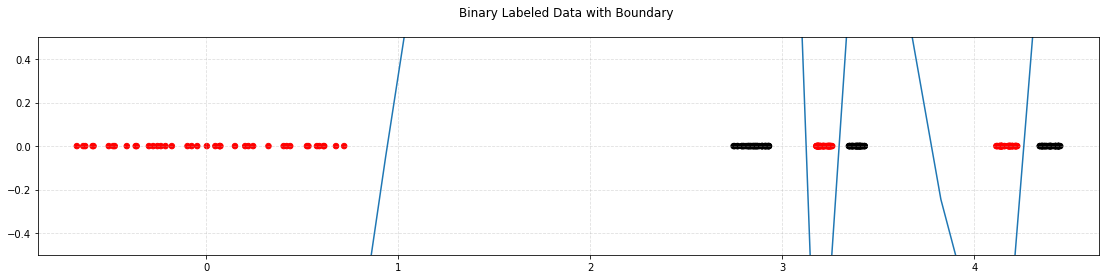

Loss:0.375055 Acc:1.000000 val_loss:0.378077 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2219.43it/s]

0.2367385254778144 0.1383160406237469


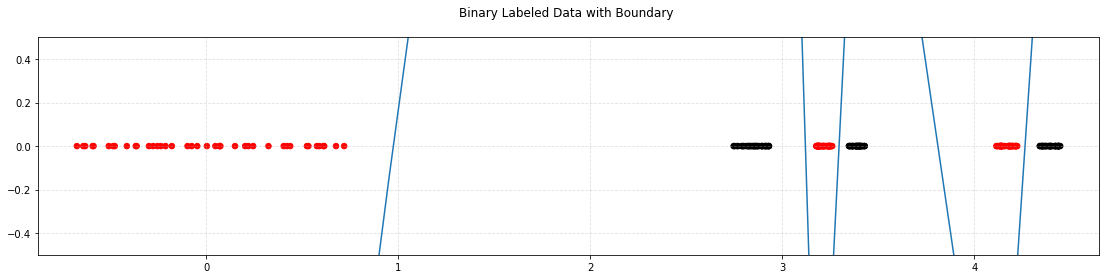

Loss:0.346857 Acc:1.000000 val_loss:0.350205 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2232.54it/s]

0.19128160581969003 0.15557583198010363


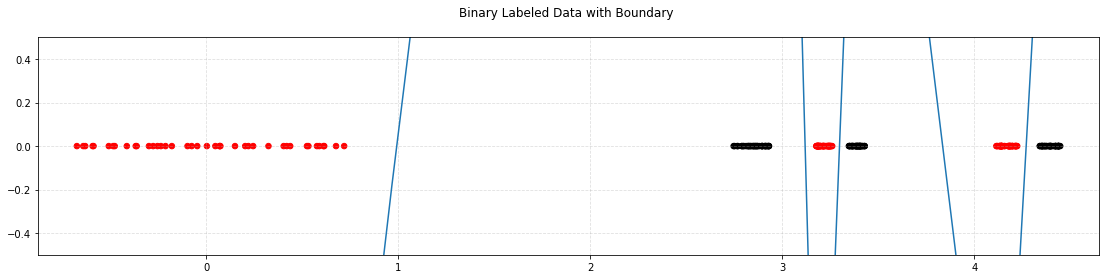

Loss:0.327483 Acc:1.000000 val_loss:0.331376 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2379.18it/s]

0.15311649696514523 0.1743663184872068


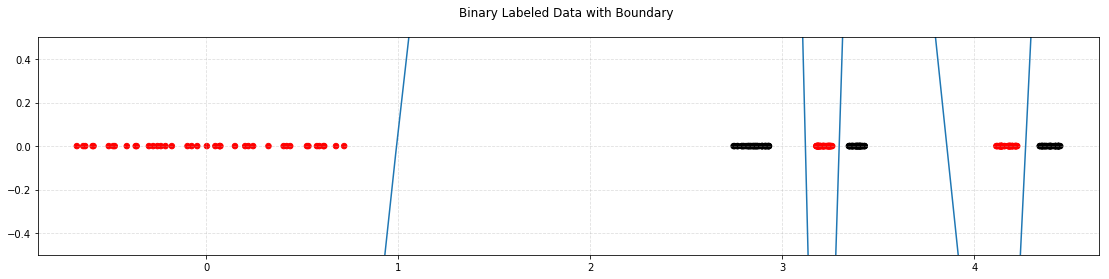

Loss:0.315809 Acc:1.000000 val_loss:0.318310 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2240.80it/s]

0.12110563929982714 0.19470374181390676


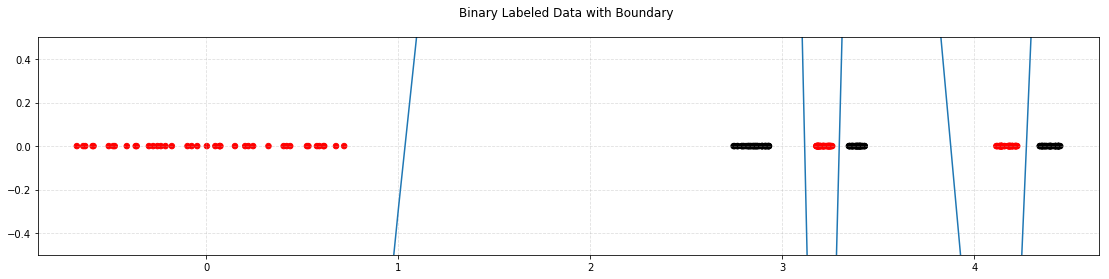

In [61]:
mynetwork.scoop_initialization(xmin=min(X_train), xmax= max(X_train))
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, validation_data=(X_val, Y_val), optimizer = RMSprop, beta = 0.9, regularization= L2 , lambd = 0.5)
    nregion.graph(X_train, Y_train, decision=mynetwork.decision, ylim = 0.5)

# Without Regularization

Loss:0.688679 Acc:0.470833 val_loss:0.676723 val_acc:0.616667: 100%|██████████| 100/100 [00:00<00:00, 1644.16it/s]

0.6886793907511044 0


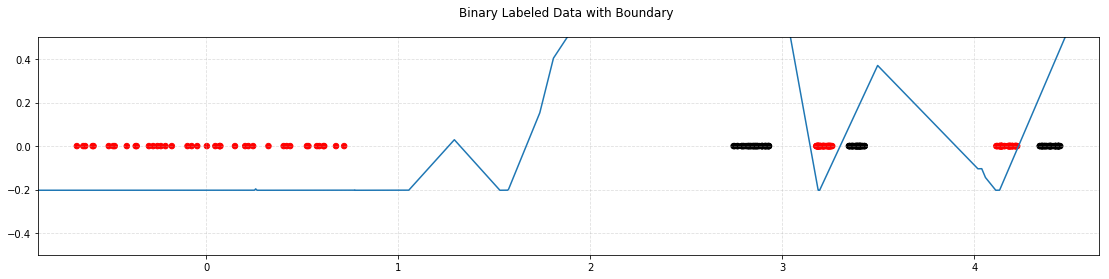

Loss:0.540601 Acc:1.000000 val_loss:0.528278 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2358.91it/s]

0.5406008102414629 0


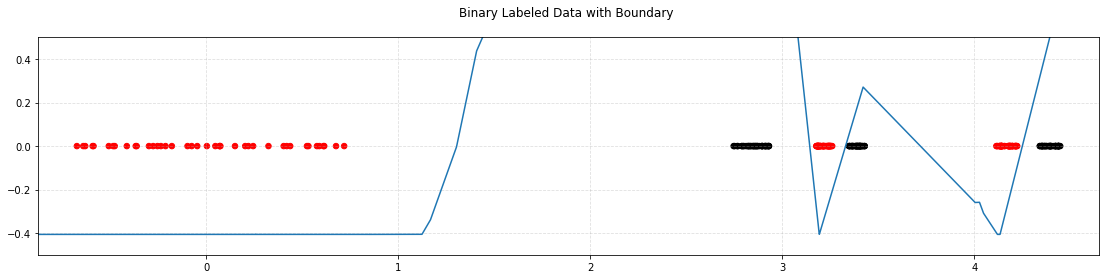

Loss:0.470065 Acc:1.000000 val_loss:0.464570 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2310.21it/s]

0.4700654113325434 0


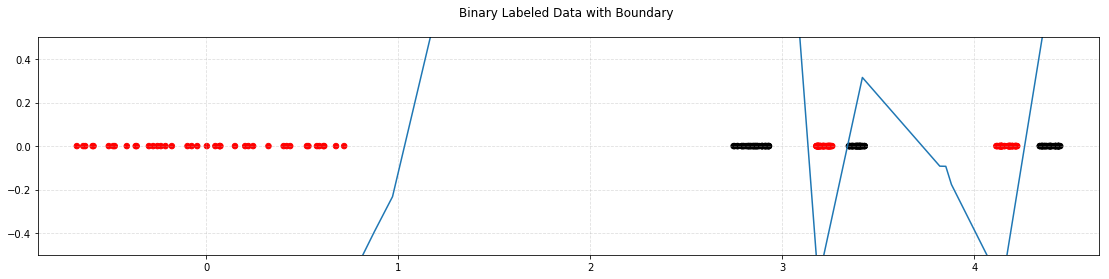

Loss:0.408424 Acc:1.000000 val_loss:0.411153 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2447.19it/s]

0.40842402451075716 0


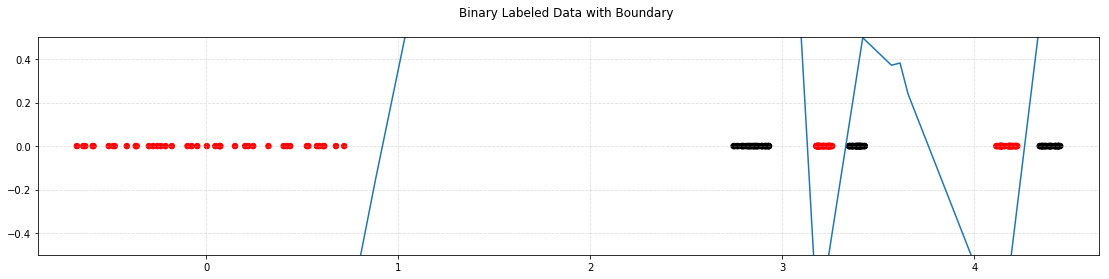

Loss:0.353867 Acc:1.000000 val_loss:0.361028 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2263.52it/s]

0.35386698544297357 0


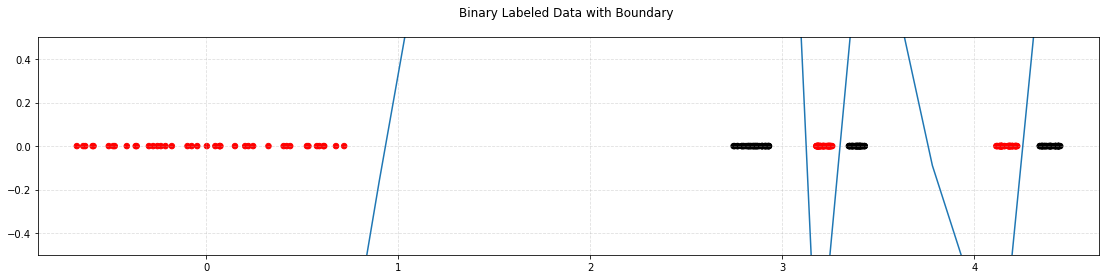

Loss:0.288088 Acc:1.000000 val_loss:0.291000 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2156.78it/s]

0.28808815239362595 0


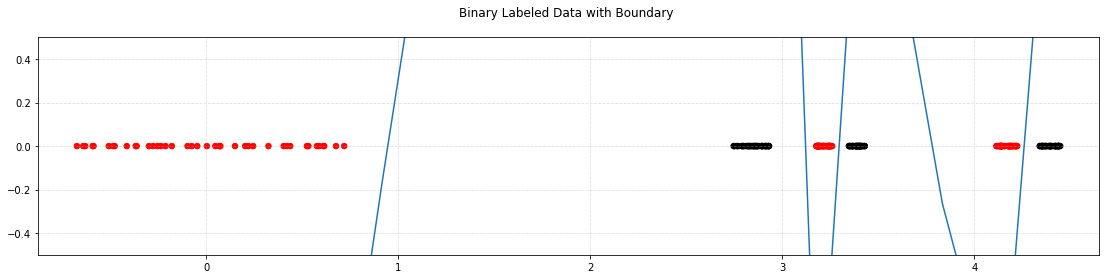

Loss:0.235874 Acc:1.000000 val_loss:0.238988 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2396.44it/s]

0.23587359577429473 0


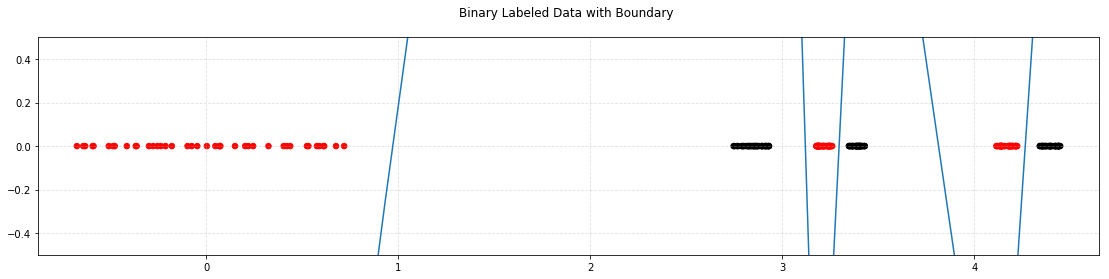

Loss:0.190660 Acc:1.000000 val_loss:0.194059 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2104.88it/s]

0.19066006392060883 0


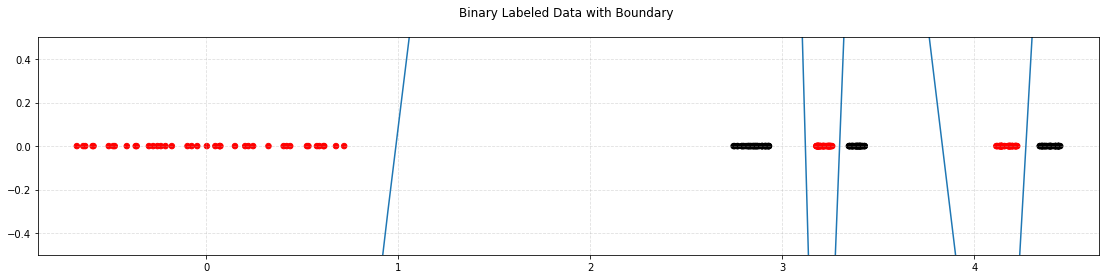

Loss:0.152755 Acc:1.000000 val_loss:0.156823 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2238.67it/s]

0.1527546525158657 0


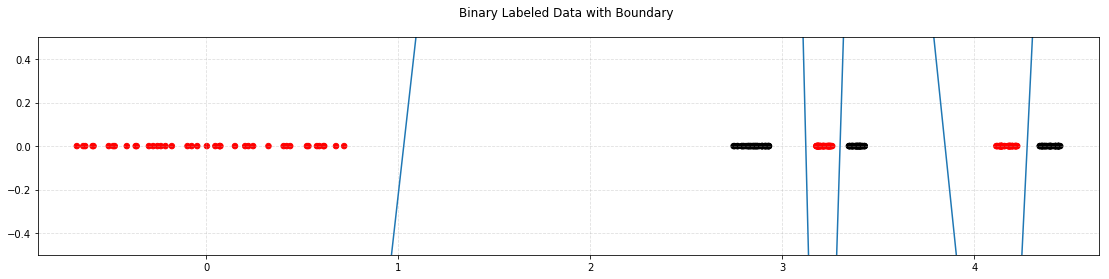

Loss:0.120788 Acc:1.000000 val_loss:0.125153 val_acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 2390.01it/s]

0.12078762195834829 0


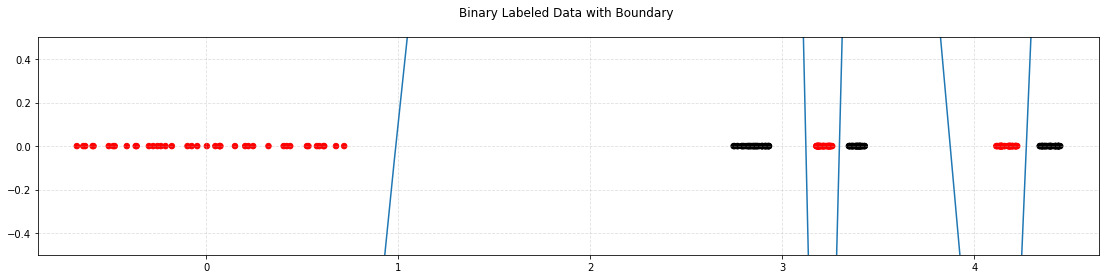

In [62]:
mynetwork.scoop_initialization(xmin=min(X_train), xmax= max(X_train))
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, validation_data=(X_val, Y_val), optimizer = RMSprop, beta = 0.9, regularization= None)
    nregion.graph(X_train, Y_train, decision=mynetwork.decision, ylim = 0.5)